# Think Bayes: Chapter 3

This notebook presents example code and exercise solutions for Think Bayes.

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

In [7]:
from __future__ import print_function, division

% matplotlib inline

from thinkbayes2 import Hist, Pmf, Suite, Cdf
import thinkplot


## The Dice problem

Suppose I have a box of dice that contains a 4-sided die, a 6-sided
die, an 8-sided die, a 12-sided die, and a 20-sided die.

I select a die from the box at random, roll it, and get a 6.
What is the probability that I rolled each die?

The `Dice` class inherits `Update` and provides `Likelihood`

In [8]:
class Dice(Suite):
    def Likelihood(self, data, hypo):
        if hypo < data:
            return 0
        else:
            return 1/hypo

Here's what the update looks like:

In [14]:
suite = Dice([4, 6, 8, 12, 20])
suite.Update(6)
suite.Print()

4 0.0
6 0.3921568627450981
8 0.29411764705882354
12 0.19607843137254904
20 0.11764705882352944


And here's what it looks like after more data:

In [15]:
for roll in [6, 8, 7, 7, 5, 4]:
        suite.Update(roll)
        print('Roll ',roll,' probability for each dice:')
        suite.Print()


Roll  6  probability for each dice:
4 0.0
6 0.5256241787122208
8 0.2956636005256242
12 0.1314060446780552
20 0.047306176084099885
Roll  8  probability for each dice:
4 0.0
6 0.0
8 0.7351339577434111
12 0.2178174689610107
20 0.04704857329557832
Roll  7  probability for each dice:
4 0.0
6 0.0
8 0.817574005587765
12 0.16149609986918817
20 0.020929894543046793
Roll  7  probability for each dice:
4 0.0
6 0.0
8 0.8757125344951456
12 0.11532016915162413
20 0.008967296353230295
Roll  5  probability for each dice:
4 0.0
6 0.0
8 0.9158452719690099
12 0.08040342579700499
20 0.0037513022339850668
Roll  4  probability for each dice:
4 0.0
6 0.0
8 0.9432484536722124
12 0.0552061280612909
20 0.001545418266496554


## The train problem

The Train problem has the same likelihood as the Dice problem.

In [17]:
class Train(Suite):
    def Likelihood(self, data, hypo):
        if hypo < data:
            return 0
        else:
            return 1/hypo

But there are many more hypotheses

In [41]:
hypos = range(1, 1001)
suite = Train(hypos)
suite.Update(60)

In [36]:
suite.Print()

1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 0.0
40 0.0
41 0.0
42 0.0
43 0.0
44 0.0
45 0.0
46 0.0
47 0.0
48 0.0
49 0.0
50 0.0
51 0.0
52 0.0
53 0.0
54 0.0
55 0.0
56 0.0
57 0.0
58 0.0
59 0.0
60 0.005905417875729855
61 0.00580860774661953
62 0.00571492052489986
63 0.0056242075006951
64 0.005536329258496739
65 0.005451154962212174
66 0.00536856170520896
67 0.005288433918564049
68 0.005210662831526343
69 0.005135145978895526
70 0.00506178675062559
71 0.004990493979490018
72 0.004921181563108212
73 0.004853768117038236
74 0.00478817665599718
75 0.004724334300583884
76 0.004662172007155148
77 0.004601624318750537
78 0.004542629135176811
79 0.00448512750055432
80 0.004429063406797391
81 0.004374383611651744
82 0.004321037470046235
83 0.0042689767776360405
84 0.004218155625521325
85 

676 0.0005241495155973244
677 0.0005233752917928971
678 0.0005226033518345004
679 0.0005218336856315041
680 0.0005210662831526343
681 0.0005203011344255379
682 0.0005195382295363509
683 0.0005187775586292699
684 0.0005180191119061276
685 0.0005172628796259726
686 0.0005165088521046521
687 0.0005157570197143978
688 0.0005150073728834176
689 0.000514259902095488
690 0.0005135145978895526
691 0.0005127714508593216
692 0.0005120304516528775
693 0.0005112915909722818
694 0.0005105548595731863
695 0.000509820248264448
696 0.0005090877479077461
697 0.0005083573494172042
698 0.0005076290437590133
699 0.0005069028219510604
700 0.000506178675062559
701 0.0005054565942136823
702 0.0005047365705752013
703 0.0005040185953681242
704 0.0005033026598633399
705 0.0005025887553812643
706 0.0005018768732914891
707 0.0005011670050124346
708 0.0005004591420110046
709 0.0004997532758022445
710 0.0004990493979490019
711 0.0004983475000615911
712 0.0004976475737974597
713 0.0004969496108608573
714 0.000496253

Here's what the posterior looks like

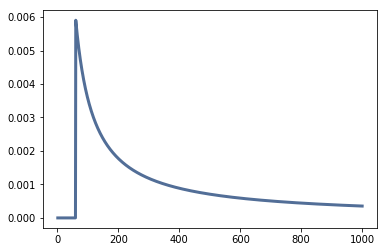

In [19]:
thinkplot.Pdf(suite)

And here's how we can compute the posterior mean

In [22]:
def Mean(suite):
    total = 0
    for hypo, prob in suite.Items():
        total += hypo * prob
    return total

Mean(suite)

333.41989326371095

Or we can just use the method

In [21]:
suite.Mean()

333.41989326371095

In [42]:
#to improve the estimation, get more data or get more background information
for data in [60, 30, 90]:
    suite.Update(data)
    print(suite.Mean())

333.41989326371095
178.5473531797158
164.3055864227336


## Sensitivity to the prior

Here's a function that solves the train problem for different priors and data

In [10]:
def MakePosterior(high, dataset, constructor=Train):
    """Solves the train problem.
    
    high: int maximum number of trains
    dataset: sequence of observed train numbers
    constructor: function used to construct the Train object
    
    returns: Train object representing the posterior suite
    """
    hypos = range(1, high+1)
    suite = constructor(hypos)

    for data in dataset:
        suite.Update(data)

    return suite

Let's run it with the same dataset and several uniform priors

In [11]:
dataset = [30, 60, 90]

for high in [500, 1000, 2000]:
    suite = MakePosterior(high, dataset)
    print(high, suite.Mean())

The results are quite sensitive to the prior, even with several observations.

## Power law prior

Now let's try it with a power law prior.

In [12]:
class Train2(Train):

    def __init__(self, hypos, alpha=1.0):
        Pmf.__init__(self)
        for hypo in hypos:
            self[hypo] = hypo**(-alpha)
        self.Normalize()

Here's what a power law prior looks like, compared to a uniform prior

In [13]:
high = 100
hypos = range(1, high+1)
suite1 = Train(hypos)
suite2 = Train2(hypos)
thinkplot.Pdf(suite1)
thinkplot.Pdf(suite2)

Now let's see what the posteriors look like after observing one train.

In [14]:
dataset = [60]
high = 1000

thinkplot.PrePlot(num=2)

constructors = [Train, Train2]
labels = ['uniform', 'power law']

for constructor, label in zip(constructors, labels):
    suite = MakePosterior(high, dataset, constructor)
    suite.label = label
    thinkplot.Pmf(suite)

thinkplot.Config(xlabel='Number of trains',
                 ylabel='Probability')

The power law gives less prior probability to high values, which yields lower posterior means, and less sensitivity to the upper bound.

In [15]:
dataset = [30, 60, 90]

for high in [500, 1000, 2000]:
    suite = MakePosterior(high, dataset, Train2)
    print(high, suite.Mean())

## Credible intervals

To compute credible intervals, we can use the `Percentile` method on the posterior.

In [16]:
hypos = range(1, 1001)
suite = Train(hypos)
suite.Update(60)

suite.Percentile(5), suite.Percentile(95)

If you have to compute more than a few percentiles, it is more efficient to compute a CDF.

Also, a CDF can be a better way to visualize distributions.

In [17]:
cdf = Cdf(suite)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Number of trains',
                 ylabel='Cumulative Probability',
                 legend=False)

`Cdf` also provides `Percentile`

In [18]:
cdf.Percentile(5), cdf.Percentile(95)

## Exercises

**Exercise:** To write a likelihood function for the locomotive problem, we had
to answer this question:  "If the railroad has `N` locomotives, what
is the probability that we see number 60?"

The answer depends on what sampling process we use when we observe the
locomotive.  In the book, I resolved the ambiguity by specifying
that there is only one train-operating company (or only one that we
care about).

But suppose instead that there are many companies with different
numbers of trains.  And suppose that you are equally likely to see any
train operated by any company.
In that case, the likelihood function is different because you
are more likely to see a train operated by a large company.

As an exercise, implement the likelihood function for this variation
of the locomotive problem, and compare the results.

In [19]:
# Solution goes here